# Task 3.6 Interoperability Core Ontology-based Data Structures 

- (Lead: UCL; Partners: FRAUNHOFER, SINTEF, UNIBO)

Demonstration of the Core Ontology Based Data Structures: DOME 4.0 CUDS

In the following we do: 
- import the ontology name spaces, i.e, the ontology classes of the DOME 4.0 Eco System including W3C standard ontology, the manufacturing Ontology iof, and other marketplace ontology like EVMPO.
- import the DOME 4.0  core eco system (dcoretbox) ontolgy as well as the DOME 4.0 data set ontology (domeo).
- domeo contains the schema according to D3.1

In [1]:
from simphony_osp.namespaces import city, rdfschema, dcoretbox, simphony
from simphony_osp.namespaces import owl,foaf, emmo, domeo, dcterms, evmpo, eurosci, iof
from simphony_osp.namespaces import http_method

from simphony_osp.tools import semantic2dot, pretty_print
from simphony_osp.tools import search,  export_file, import_file, pretty_print, search
from simphony_osp.tools.search import sparql

from simphony_osp.ontology import RESTRICTION_QUANTIFIER, RESTRICTION_TYPE, OntologyIndividual
from simphony_osp.ontology import COMPOSITION_OPERATOR, Composition, Restriction

from simphony_osp.ontology.relationship import OntologyRelationship
from simphony_osp.ontology.annotation import OntologyAnnotation

from simphony_osp.session import Session, core_session
import json, rdflib
from rdflib import Graph, URIRef

# these are useful to serialise or display some data strucrues. 
from rdflib.plugins.parsers.jsonld import to_rdf as json_to_rdf

from json2html import *
from IPython.core.display import display, HTML
import pandas as pd


/var/folders/jd/j0s9pmrj0kg0ww159sk08ls40000gp/T/ipykernel_53282/174612537.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Load the DOME 4.0 ecosystem catalog
- This is the T-Box of the core ontology 
- We load it into the core sesion (the default session of SimPhoNy-OSP)
- This is a collection of services, platforms etc that are defined and managed by DOME 4.0 already.
- We will define a new DomeDataSet catalog and add it to the DOME 4.0 catalog below.
- In the actual platform this is embeded in teh backend of `sigraDB` and does not need to be loaded directly. 

In [96]:
# Load the DOME 4.0 A-BOX ctalog 
# - (normall done in the DOME 4.0 Knowledge Service, but here we do it explicitly for the demonstration purposes)


In [97]:
SIGRA_ROOT='/Users/adham/dev/new/dome/Ontology-matters/'

## Create a DomeDataSet and connect it with all "metadata"  elements from the DOME 4.0 Data Set Ontology.

In [106]:
# clear the core session if restarting
core_session.clear()

In [107]:
import_file(SIGRA_ROOT+'dome4.0_core_abox.ttl', all_triples=True)
import_file(SIGRA_ROOT+'/external/http-methods.rdf', all_triples=True)
# use `all_triples` as some ontology items, especially from loose W2C "standards" lack ontology
# definitions.

{<OntologyIndividual: CONNECT http://www.w3.org/2011/http-methods#CONNECT>,
 <OntologyIndividual: DELETE http://www.w3.org/2011/http-methods#DELETE>,
 <OntologyIndividual: GET http://www.w3.org/2011/http-methods#GET>,
 <OntologyIndividual: HEAD http://www.w3.org/2011/http-methods#HEAD>,
 <OntologyIndividual: OPTIONS http://www.w3.org/2011/http-methods#OPTIONS>,
 <OntologyIndividual: PATCH http://www.w3.org/2011/http-methods#PATCH>,
 <OntologyIndividual: POST http://www.w3.org/2011/http-methods#POST>,
 <OntologyIndividual: PUT http://www.w3.org/2011/http-methods#PUT>,
 <OntologyIndividual: TRACE http://www.w3.org/2011/http-methods#TRACE>}

## Letus plot the Graph of all triplets (data) stored in the DOME 4.0 catalog.

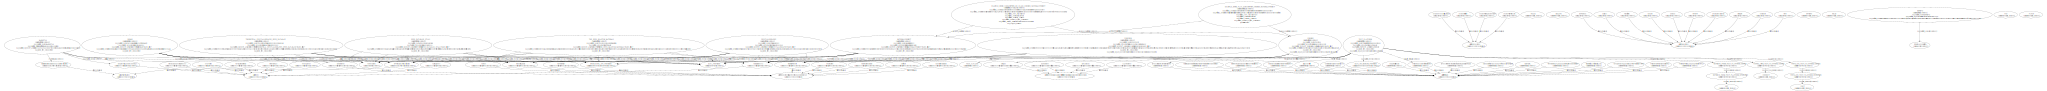

In [108]:
semantic2dot(core_session)

## Demonstrate SPARQL query accroding to type: find all platforms

- First lets create an instance (entity in the A-Box of DOME 4.0) of a DomeDataSet

In [5]:
data_set=domeo.DomeDataSet()

In [6]:
pretty_print(data_set)

- Ontology individual named :
  identifier: fbff620c-c34f-4b3e-baac-b4cd9bad65b9
  type: DomeDataSet (domeo )
  superclasses: DomeDataSet (domeo ), DataSet (domeo ), EncodedData (domeo ), Data (domeo ), Signifier (domeo ), Sign (domeo ), SemioticEntity (domeo ), IntangibleEntity (domeo ), AbstractEntity (domeo ), CUDS (domeo ), Thing (owl )


## Let us attach to it all the parts according to D3.1  and D3.2

In [10]:
title=domeo.Title(string_value="This is the title of the DOME Data Set")

In [22]:
keywords=domeo.SyntacticKeyword(string_value="DOME4.0, stress, Cu")

In [26]:
semantic_keywords=domeo.SemanticKeyword()

In [30]:
stress_keyword=emmo.Stress()

In [31]:
semantic_keywords.connect(stress_keyword, rel=domeo.hasPart)

In [47]:
desc=domeo.Description(string_value="This is the description of this data set")

In [49]:
id=domeo.IssuedDate()

In [52]:
pb=domeo.Publisher(iri="https://open-research-europe.ec.europa.eu")

In [57]:
ct=domeo.Creator(iri="https://como.ceb.cam.ac.uk/people/ab349/")

In [81]:
GPL=domeo.License(iri="https://www.gnu.org/licenses/gpl-3.0.html")

In [82]:
desc=domeo.Description(string_value="The GNU General Public License is a free, copyleft license for software and other kinds of works.")

In [84]:
GPL.connect(desc, rel=domeo.hasPart)

## Now assign the metadata as parts!


In [75]:
city.age

<OntologyAttribute: age https://www.simphony-osp.eu/city#age>

In [32]:
data_set.connect(title, rel=domeo.hasPart)

In [33]:
data_set.connect(keywords, rel=domeo.hasPart)

In [34]:
data_set.connect(semantic_keywords, rel=domeo.hasPart)

In [45]:
data_set.connect(desc, rel=domeo.hasPart)

In [50]:
data_set.connect(id, rel=domeo.hasPart)

In [ ]:
data_set.connect(pb, rel=domeo.hasPart)

In [53]:
data_set.connect(pb, rel=domeo.hasPart)

In [58]:
data_set.connect(ct, rel=domeo.hasPart)

In [85]:
data_set.connect(GPL, rel=domeo.hasPart)

In [86]:
pretty_print(data_set)

- Ontology individual named :
  identifier: fbff620c-c34f-4b3e-baac-b4cd9bad65b9
  type: DomeDataSet (domeo )
  superclasses: DomeDataSet (domeo ), DataSet (domeo ), EncodedData (domeo ), Data (domeo ), Signifier (domeo ), Sign (domeo ), SemioticEntity (domeo ), IntangibleEntity (domeo ), AbstractEntity (domeo ), CUDS (domeo ), Thing (owl )
   |_Relationship hasPart (domeo ) (domeo):
     - Ontology individual of class Creator named 
      . identifier: https://como.ceb.cam.ac.uk/people/ab349/
     - Ontology individual of class Description named 
      . identifier: a30cdc2f-5d8f-4ef2-aefd-7c89cb680dd6
      .  string_value: This is the description of this data set
     - Ontology individual of class IssuedDate named 
      . identifier: b7d5424e-9f94-4ba3-8851-1b766e86dcf1
     - Ontology individual of class License named 
      . identifier: 64f224f7-f615-4dc3-ab59-dfb5cd8e40d0
     - Ontology individual of class License named 
      . identifier: https://www.gnu.org/licenses/gpl-3.

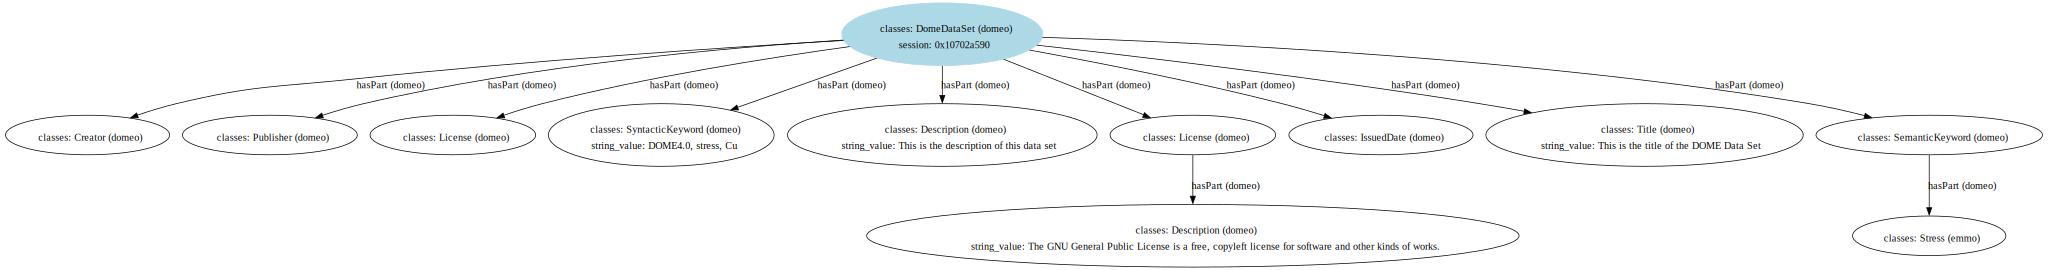

In [87]:
semantic2dot(data_set,rel=owl.topObjectProperty)

In [70]:
json.loads(export_file(data_set,all_triples=True, all_statements=True, format='json-ld'))

[{'@id': 'https://www.simphony-osp.eu/entity#fbff620c-c34f-4b3e-baac-b4cd9bad65b9',
  '@type': ['https://dome40.eu/semantics/domeo#DomeDataSet'],
  'https://dome40.eu/semantics/domeo#hasPart': [{'@id': 'https://open-research-europe.ec.europa.eu'},
   {'@id': 'https://www.simphony-osp.eu/entity#b7d5424e-9f94-4ba3-8851-1b766e86dcf1'},
   {'@id': 'https://como.ceb.cam.ac.uk/people/ab349/'},
   {'@id': 'https://www.simphony-osp.eu/entity#7b7dd4ee-4b2f-4f87-8cfc-3e1c05e79771'},
   {'@id': 'https://www.simphony-osp.eu/entity#5fe26844-d985-4f4d-87c2-7d93325c73bc'},
   {'@id': 'https://www.simphony-osp.eu/entity#a30cdc2f-5d8f-4ef2-aefd-7c89cb680dd6'},
   {'@id': 'https://www.simphony-osp.eu/entity#f046c062-bd70-46aa-a512-fca30f1151ff'}],
  'https://www.simphony-osp.eu/simphony#main': [{'@value': True}]}]

In [220]:
# this is the simphony way
res = sparql(
    f"""SELECT ?s WHERE {{
        ?s a owl:Class ;
            rdfs:label ?label .
            FILTER (CONTAINS(STR(?s), "k") || CONTAINS(STR(?label), "k"))
    }}
    """, ontology=True)

In [221]:
def search_ontology(some_string):
    # this is the simphony way
    res = sparql(
        f"""SELECT ?s WHERE {{
            ?s a owl:Class ;
                rdfs:label ?label .
                FILTER (CONTAINS(STR(?s), "{some_string}") || CONTAINS(STR(?label), "{some_string}"))
        }}
        """, ontology=True)
    return json.loads(res.serialize(format="json").decode("utf-8"))

In [222]:
print(res.serialize(format="json"))

b'{"results": {"bindings": [{"s": {"type": "uri", "value": "http://www.w3.org/2004/02/skos/core#ConceptScheme"}}, {"s": {"type": "uri", "value": "http://www.w3.org/2004/02/skos/core#Collection"}}, {"s": {"type": "uri", "value": "http://www.w3.org/2004/02/skos/core#OrderedCollection"}}, {"s": {"type": "uri", "value": "http://www.w3.org/2004/02/skos/core#Concept"}}, {"s": {"type": "uri", "value": "http://www.w3.org/2004/02/skos/core#Concept"}}]}, "head": {"vars": ["s"]}}'


In [223]:
for i in res:
    print(i)

(rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#ConceptScheme'),)
(rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#Collection'),)
(rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#OrderedCollection'),)
(rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#Concept'),)
(rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#Concept'),)


In [224]:
res=search_ontology("k")

In [225]:
res


{'results': {'bindings': [{'s': {'type': 'uri',
     'value': 'http://www.w3.org/2004/02/skos/core#ConceptScheme'}},
   {'s': {'type': 'uri',
     'value': 'http://www.w3.org/2004/02/skos/core#Collection'}},
   {'s': {'type': 'uri',
     'value': 'http://www.w3.org/2004/02/skos/core#OrderedCollection'}},
   {'s': {'type': 'uri',
     'value': 'http://www.w3.org/2004/02/skos/core#Concept'}},
   {'s': {'type': 'uri',
     'value': 'http://www.w3.org/2004/02/skos/core#Concept'}}]},
 'head': {'vars': ['s']}}

In [226]:
res["results"]['bindings']

[{'s': {'type': 'uri',
   'value': 'http://www.w3.org/2004/02/skos/core#ConceptScheme'}},
 {'s': {'type': 'uri',
   'value': 'http://www.w3.org/2004/02/skos/core#Collection'}},
 {'s': {'type': 'uri',
   'value': 'http://www.w3.org/2004/02/skos/core#OrderedCollection'}},
 {'s': {'type': 'uri',
   'value': 'http://www.w3.org/2004/02/skos/core#Concept'}},
 {'s': {'type': 'uri',
   'value': 'http://www.w3.org/2004/02/skos/core#Concept'}}]

In [227]:
def res2list(R, as_json=False):
    results_list = []

    for row in R:
        # Using a dictionary comprehension to get the desired structure
        row_dict = {key: str(value) for key, value in zip(['s', 'p', 'o'], row)}
        results_list.append(row_dict)

    if as_json:
        return json.dumps(results_list, indent=4)
    
    return results_list

In [228]:
res2list(res)

[{'s': 'r', 'p': 'e', 'o': 's'}, {'s': 'h', 'p': 'e', 'o': 'a'}]

In [229]:
def search_ontology(some_string):
    # this is the simphony way
    res = sparql(
        f"""SELECT ?s WHERE {{
            ?s a owl:Class ;
                rdfs:label ?label ;
                skos:preLabel ?prefLabel .
                FILTER (CONTAINS(STR(?s), "{some_string}") || CONTAINS(STR(?label), "{some_string}") || CONTAINS(STR(?prefLabel), "{some_string}") )
        }}
        """, ontology=True)
    return res2list(res)

In [230]:
res=search_ontology("t")

In [231]:
res

[]

In [232]:
def search_ontology(some_string):
    # this is the simphony way
    res = sparql(
        f"""SELECT ?s ?label ?prefLabel WHERE {{
            ?s a owl:Class .
            OPTIONAL {{ ?s rdfs:label ?label . }}
            OPTIONAL {{ ?s skos:prefLabel ?prefLabel . }}
            FILTER (
                CONTAINS(STR(?s), "{some_string}") || 
                (BOUND(?label) && CONTAINS(STR(?label), "{some_string}")) || 
                (BOUND(?prefLabel) && CONTAINS(STR(?prefLabel), "{some_string}"))
            )
        }}
        """, ontology=True)
    return res2list(res)

In [233]:
res=search_ontology("title")

In [234]:
res
    

[]

In [235]:
def search_annotation(some_string):
    # this is the simphony way
    res = sparql(
        f"""SELECT ?s ?label ?prefLabel WHERE {{
            ?s a owl:Annotation .
            OPTIONAL {{ ?s rdfs:label ?label . }}
            OPTIONAL {{ ?s skos:prefLabel ?prefLabel . }}
            FILTER (
                CONTAINS(STR(?s), "{some_string}") || 
                (BOUND(?label) && CONTAINS(STR(?label), "{some_string}")) || 
                (BOUND(?prefLabel) && CONTAINS(STR(?prefLabel), "{some_string}"))
            )
        }}
        """, ontology=True)
    return res2list(res)

In [236]:
res=search_ontology("title")


In [237]:
res

[]

In [238]:
for i in data_set.annotations_iter():
    i

In [239]:
t=dcterms.title


In [240]:
t

<OntologyAnnotation: Title http://purl.org/dc/terms/title>

In [244]:
#annotations do not work and are evit semantically! 
 data_set.connect(t, "hello")

IndentationError: unexpected indent (3136545117.py, line 2)

In [245]:
core_session.graph

<Graph identifier=N6a1a22740e804deaa0c61ee7209109dc (<class 'rdflib.graph.Graph'>)>

In [246]:
for s, p, o in core_session.graph:
    print(s, p, o)

https://dome40.eu/semantics/scenario/platforms#PUBCHEM https://dome40.eu/semantics/dome4.0_core#has_platform_url_home https://pubchem.ncbi.nlm.nih.gov
https://dome40.eu/semantics/dome4.0_core#LIST_OF_TOPICS http://www.w3.org/2004/02/skos/core#prefLabel List of topics
https://dome40.eu/semantics/dome4.0_core#TTL http://www.w3.org/2004/02/skos/core#prefLabel Terse RDF Triple Language (Turtle or TTL)
https://dome40.eu/semantics/dome4.0_core#PREVIEW http://www.w3.org/2004/02/skos/core#inScheme https://dome40.eu/semantics/dome4.0_core#LIST_OF_DATA_ACTIONS
https://dome40.eu/semantics/dome4.0_core#OWL http://www.w3.org/2004/02/skos/core#prefLabel Web Ontology Language (OWL) - Model and format
https://dome40.eu/semantics/scenario/platforms#THE_OPEN_QUANTUM_MATERIALS https://dome40.eu/semantics/dome4.0_core#has_platform_url_query_api /api/discover/results/THE_OPEN_QUANTUM_MATERIALS?search_string=
https://dome40.eu/semantics/scenario/platforms#DOME4.0 https://dome40.eu/semantics/dome4.0_core#has

In [247]:
core_session.graph.serialize(format="turtle", destination="test.turtle")

<Graph identifier=N6a1a22740e804deaa0c61ee7209109dc (<class 'rdflib.graph.Graph'>)>

In [248]:

pwd


'/Users/adham/dev/new/osp-core/examples/future'

In [249]:
import graphviz

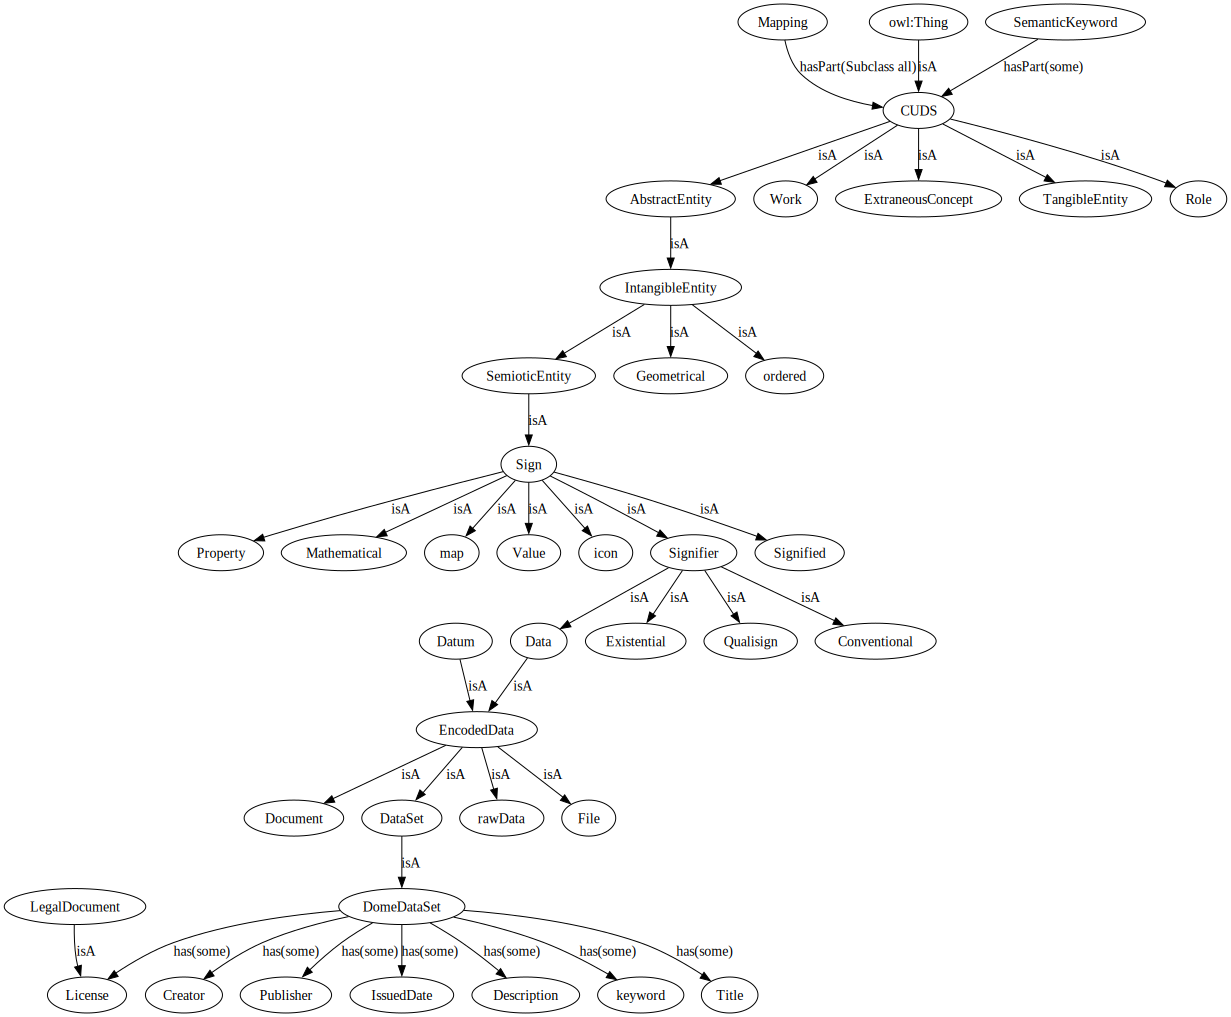

In [251]:
graphviz.Source.from_file("/Users/adham/dev/new/dome/Ontology-matters/domeo/DomeDataSet.dot")